In [1]:
#Datenbasis
#Jährlicher CO2-Ausstoß (Konsumbasierter): https://ourworldindata.org/co2-emissions
#CO2-Ausstoß komplex: https://github.com/owid/co2-data
#Bevölkerungszahlen: https://data.worldbank.org/indicator/SP.POP.TOTL
#Zuordnung Länder/Kontinente: https://ourworldindata.org/world-region-map-definitions
#BIP (Länder): https://data.worldbank.org/indicator/NY.GDP.MKTP.CD
#BIP kaufkraftbereinigt (Länder): https://data.worldbank.org/indicator/NY.GDP.PCAP.CD  
#Shape-File: https://www.naturalearthdata.com/downloads/110m-cultural-vectors/

import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
#Einlesen historischer CO2-Ausstoß
co2_roh = pd.read_csv("CO2/annual-co2-emissions-per-country.csv", sep=",", encoding="1252", engine='python')

In [3]:
#Spalten umbenennen
co2_data =  co2_roh.rename(columns={"Annual CO2 emissions": "CO2"})

In [4]:
#Historischen CO2-Ausstoß aufsummieren und in Mrd. Tonnen umrechnen
co2_sum = co2_data.groupby(['Entity','Code'], as_index=False)['CO2'].apply(lambda x: x.astype(float).sum())

In [5]:
#Historischen CO2-Ausstoß in Mrd. Tonnen umrechnen
co2_sum["CO2"] = co2_sum["CO2"]/1000000000

In [6]:
#Karte einlesen
weltkarte = gpd.read_file("map/ne_110m_admin_0_countries.shp")

In [7]:
#Umbenennen von ADM0_A3
weltkarte.rename(columns = {'ADM0_A3':'Code'}, inplace = True)

In [8]:
#Fehler ISO 3 Südsudan korrigieren
weltkarte.loc[weltkarte['Code']=='SDS', 'Code'] = "SSD"

In [9]:
#Weltkarte und CO2-Werte zusammenführen
weltkarteco2 = weltkarte.merge(co2_sum, on='Code')

<AxesSubplot:title={'center':'Historischer CO2-Ausstoß'}>

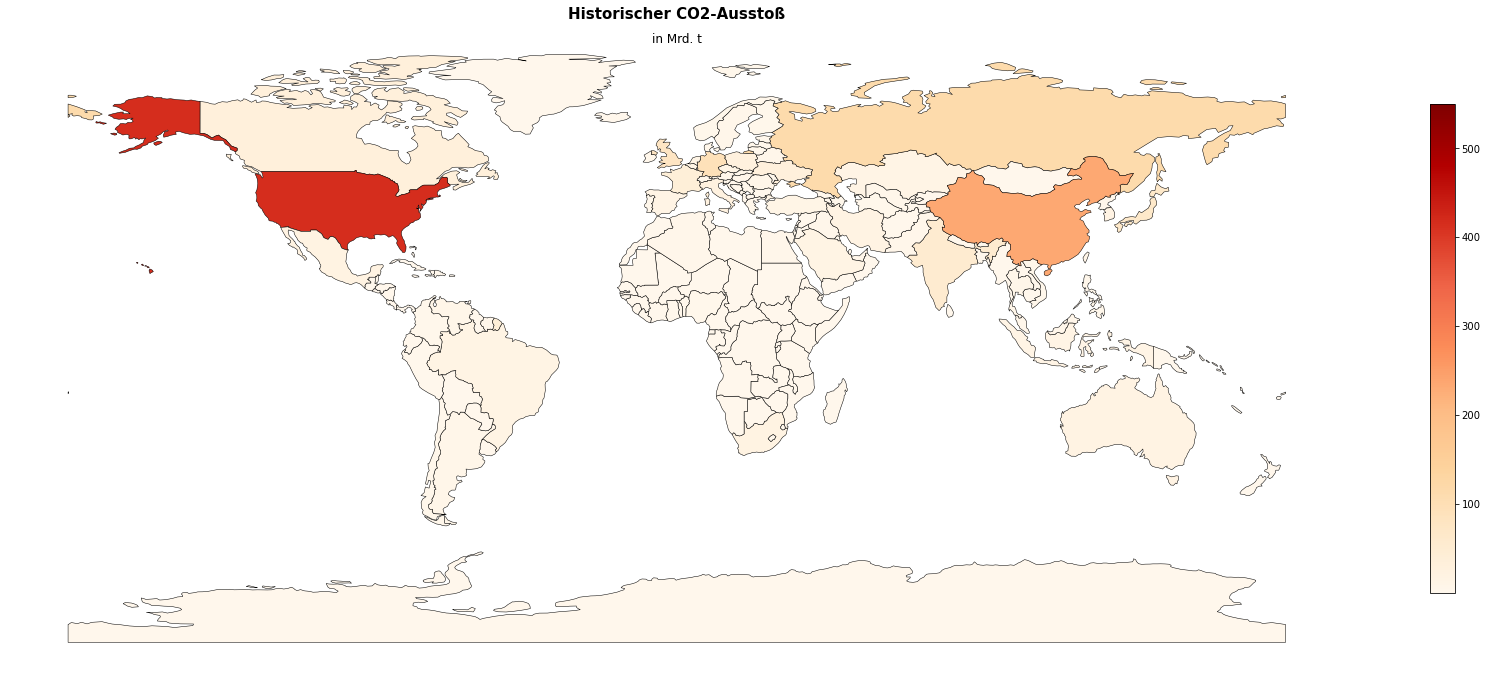

In [10]:
#Ausgabe historischer CO2-Ausstoß
fig, ax = plt.subplots(figsize=(30, 30))

ax.axis("off")
ax.set_title("Historischer CO2-Ausstoß", fontdict={"fontsize": 15, "fontweight" : "bold"})
ax.text(0,87, "in Mrd. t", ha="center", fontsize=12)

weltkarteco2.plot(column='CO2', edgecolor='k', cmap='OrRd', linewidth = .5, figsize=(30,30), legend=True, vmax=550, legend_kwds={'shrink': 0.3}, ax=ax)

In [11]:
#Einlesen Bevölkerungszahlen
bev_roh = pd.read_csv("population/API_SP.POP.TOTL_DS2_en_csv_v2_3158886.csv", sep=",", encoding="1252", engine='python', skiprows=4)

In [12]:
#CO2-Ausstoß nach 2019 filtern
co2_2019 = co2_data.loc[co2_data['Year'] == 2019]

In [13]:
#CO2-Ausstoß für 2019 und Bevölkerung zusammenführen
bev_roh.rename(columns = {'Country Code':'Code'}, inplace = True)
co2_bev = co2_2019.merge(bev_roh, on='Code')

In [14]:
#CO2-Pro-Kopf berechnen
co2_bev["CO2 Pro Kopf"] = co2_bev["CO2"] / co2_bev["2019"]

In [15]:
#Weltkarte und CO2 pro Kopf zusammenführen
weltkarteCo2ProKopf = weltkarte.merge(co2_bev, on='Code')

<AxesSubplot:title={'center':'CO2-Ausstoß pro Kopf für das Jahr 2019'}>

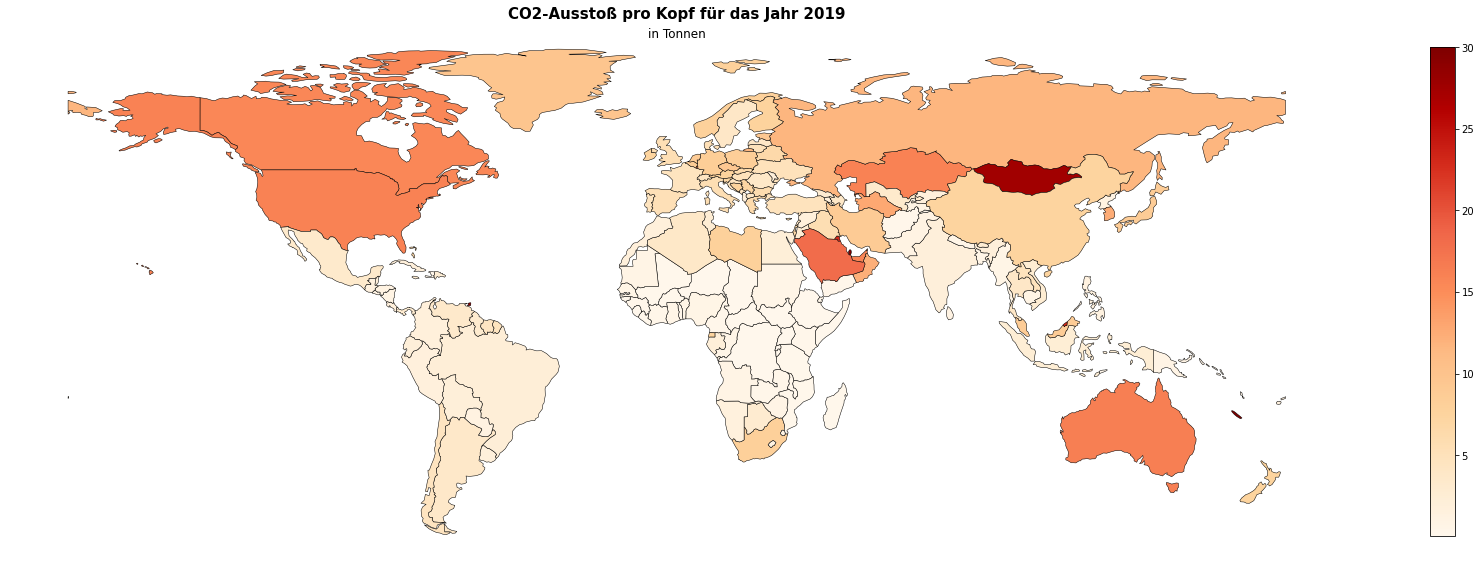

In [16]:
#Ausgabe CO2-Ausstoß pro Kopf für das Jahr 2019 (Produktionsbasiert)
fig, ax = plt.subplots(figsize=(30, 30))

ax.axis("off")
ax.set_title("CO2-Ausstoß pro Kopf für das Jahr 2019", fontdict={"fontsize": 15, "fontweight" : "bold"})
ax.text(0,87, "in Tonnen", ha="center", fontsize=12)

weltkarteCo2ProKopf.plot(column='CO2 Pro Kopf', edgecolor='k', cmap='OrRd', linewidth = .5, figsize=(30,30), legend=True, vmax = "30", legend_kwds={'shrink': 0.3}, ax=ax)

In [17]:
#Einlesen komplexe CO2-Auswertung
co2_komplex_roh = pd.read_csv("CO2/owid-co2-data.csv", sep=",", encoding="1252", engine='python')

In [18]:
#nach 2019 filtern
co2_komplex_2019 = co2_komplex_roh.loc[co2_komplex_roh['year'] == 2019].copy()

In [19]:
#iso_code umbenennen
co2_komplex_2019.rename(columns = {'iso_code':'Code'}, inplace = True)

In [20]:
#Weltkarte und CO2 pro Kopf zusammenführen
weltkarteCo2Konsum2019 = weltkarte.merge(co2_komplex_2019, on='Code')

<AxesSubplot:title={'center':'Konsumbasierter CO2-Ausstoß pro Kopf für das Jahr 2019'}>

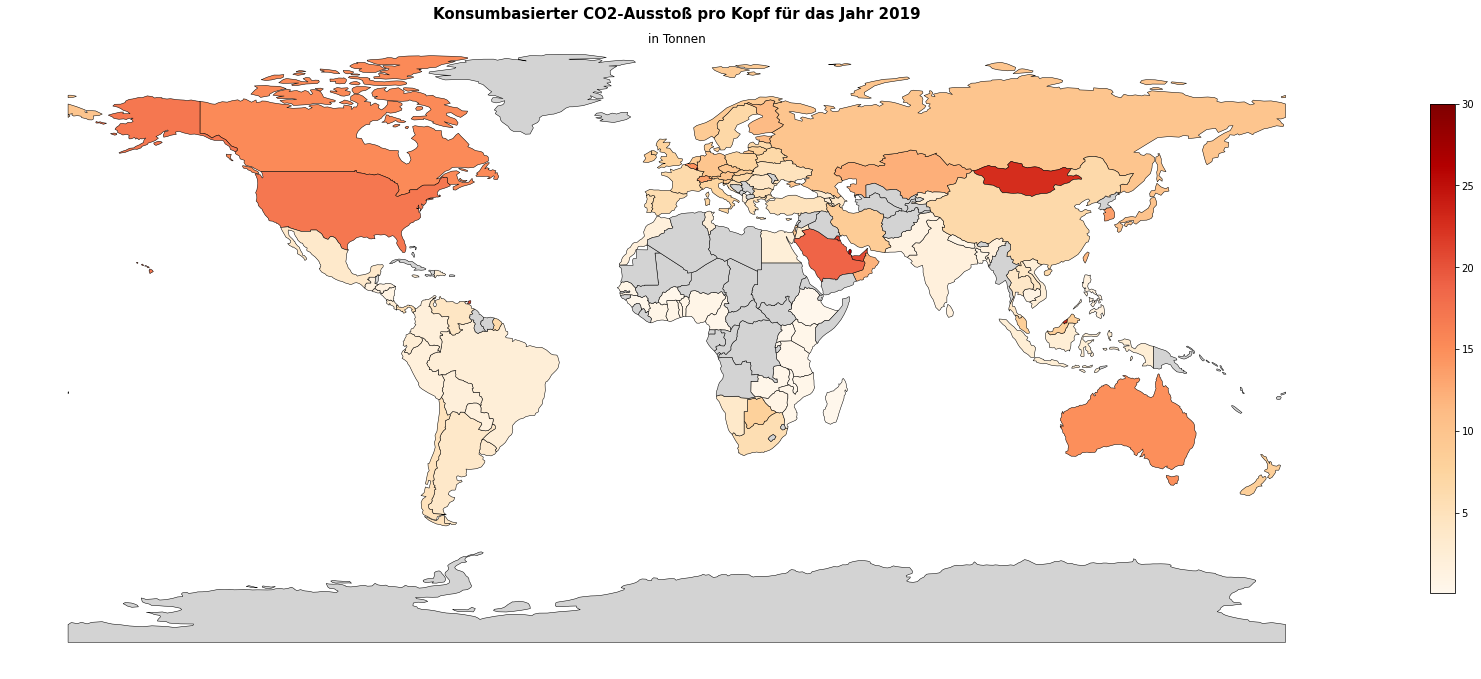

In [21]:
#Ausgabe konsumbasierter CO2-Ausstoß pro Kopf für das Jahr 2019
fig, ax = plt.subplots(figsize=(30, 30))

ax.axis("off")
ax.set_title("Konsumbasierter CO2-Ausstoß pro Kopf für das Jahr 2019", fontdict={"fontsize": 15, "fontweight" : "bold"})
ax.text(0,87, "in Tonnen", ha="center", fontsize=12)

weltkarteCo2Konsum2019.plot(column='consumption_co2_per_capita', missing_kwds= dict(color = "lightgrey"), edgecolor='k', cmap='OrRd', linewidth = .5, figsize=(30,30), vmax = "30", legend=True, legend_kwds={'shrink': 0.3}, ax=ax)

In [22]:
#Farbpalette um folgende Länder einzufärben: Deutschland, Indien, China
custom_palette = {}
for q in set(co2_komplex_2019.Code):
    if q == "DEU":
        custom_palette[q] = 'r'
    elif q == "IND":
        custom_palette[q] = 'y'
    elif q == "CHN":
        custom_palette[q] = 'black'
    else:
        custom_palette[q] = 'b'

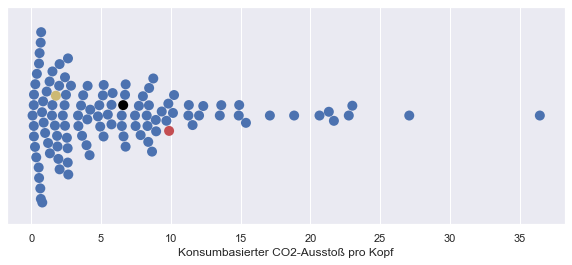

In [23]:
#Visualisierung im Swarmplot: CO2 pro Kopf - konsumbasiert 
sns.set(rc={'figure.figsize':(10,4)})
g = sns.swarmplot(x=weltkarteCo2Konsum2019["consumption_co2_per_capita"], y=[""]*len(weltkarteCo2Konsum2019), size=10, hue=weltkarteCo2Konsum2019["Code"], palette=custom_palette)
g.set_xlabel("Konsumbasierter CO2-Ausstoß pro Kopf")
g.legend_.remove()

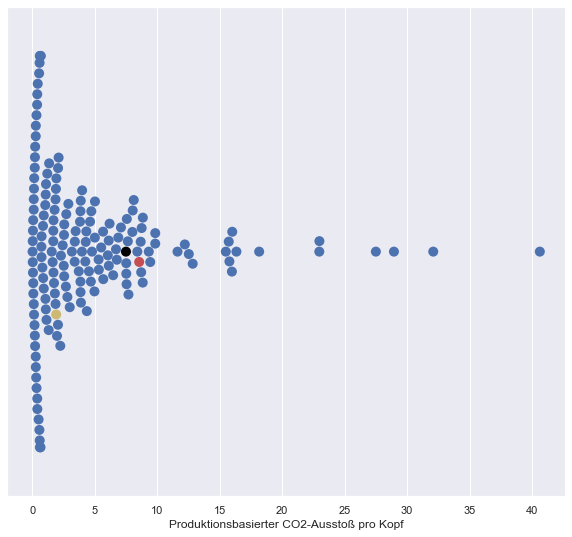

In [24]:
#Visualisierung im Swarmplot: CO2 pro Kopf - produktionsbasiert 
sns.set(rc={'figure.figsize':(10,9)})
g = sns.swarmplot(x=weltkarteCo2ProKopf["CO2 Pro Kopf"], y=[""]*len(weltkarteCo2ProKopf), size=10, hue=weltkarteCo2ProKopf["Code"], palette=custom_palette)
g.set_xlabel("Produktionsbasierter CO2-Ausstoß pro Kopf")
g.legend_.remove()

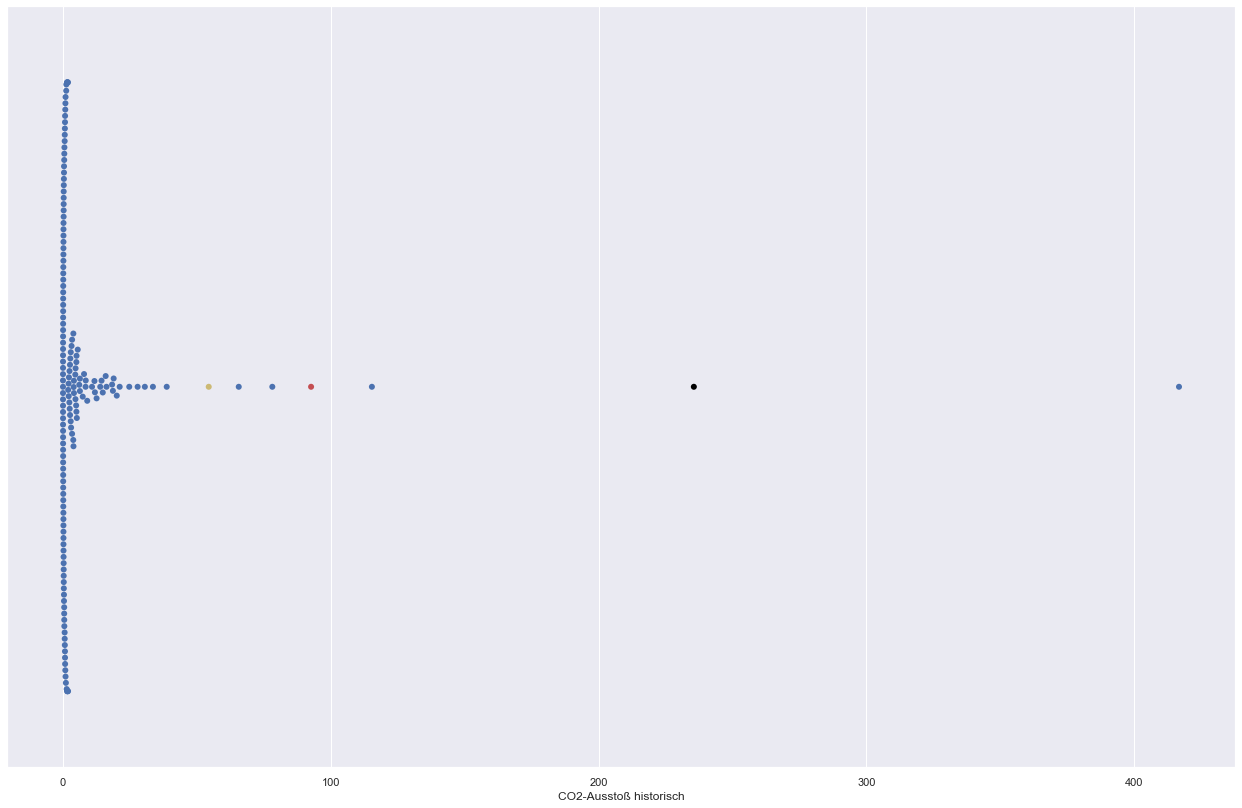

In [25]:
#Visualisierung im Swarmplot: CO2 historisch
sns.set(rc={'figure.figsize':(22,14)})
g = sns.swarmplot(x=weltkarteco2["CO2"], y=[""]*len(weltkarteco2), size=6, hue=weltkarteco2["Code"], palette=custom_palette)
g.set_xlabel("CO2-Ausstoß historisch")
g.legend_.remove()

In [26]:
####Ländern ihre Kontinente zuweisen####

#CSV Kontinente einlesen und bereinigen
continents = pd.read_csv("continents/continents-according-to-our-world-in-data.csv", sep=",", encoding="1252", engine='python')
continents.drop(['Entity', 'Year'], axis=1,inplace=True)

In [27]:
#Historischer CO2-Ausstoß mit Kontinenten verbinden
co2_data_continents = pd.merge(weltkarteco2, continents, on=['Code'])

Text(0.5, 0, 'CO2-Ausstoß historisch')

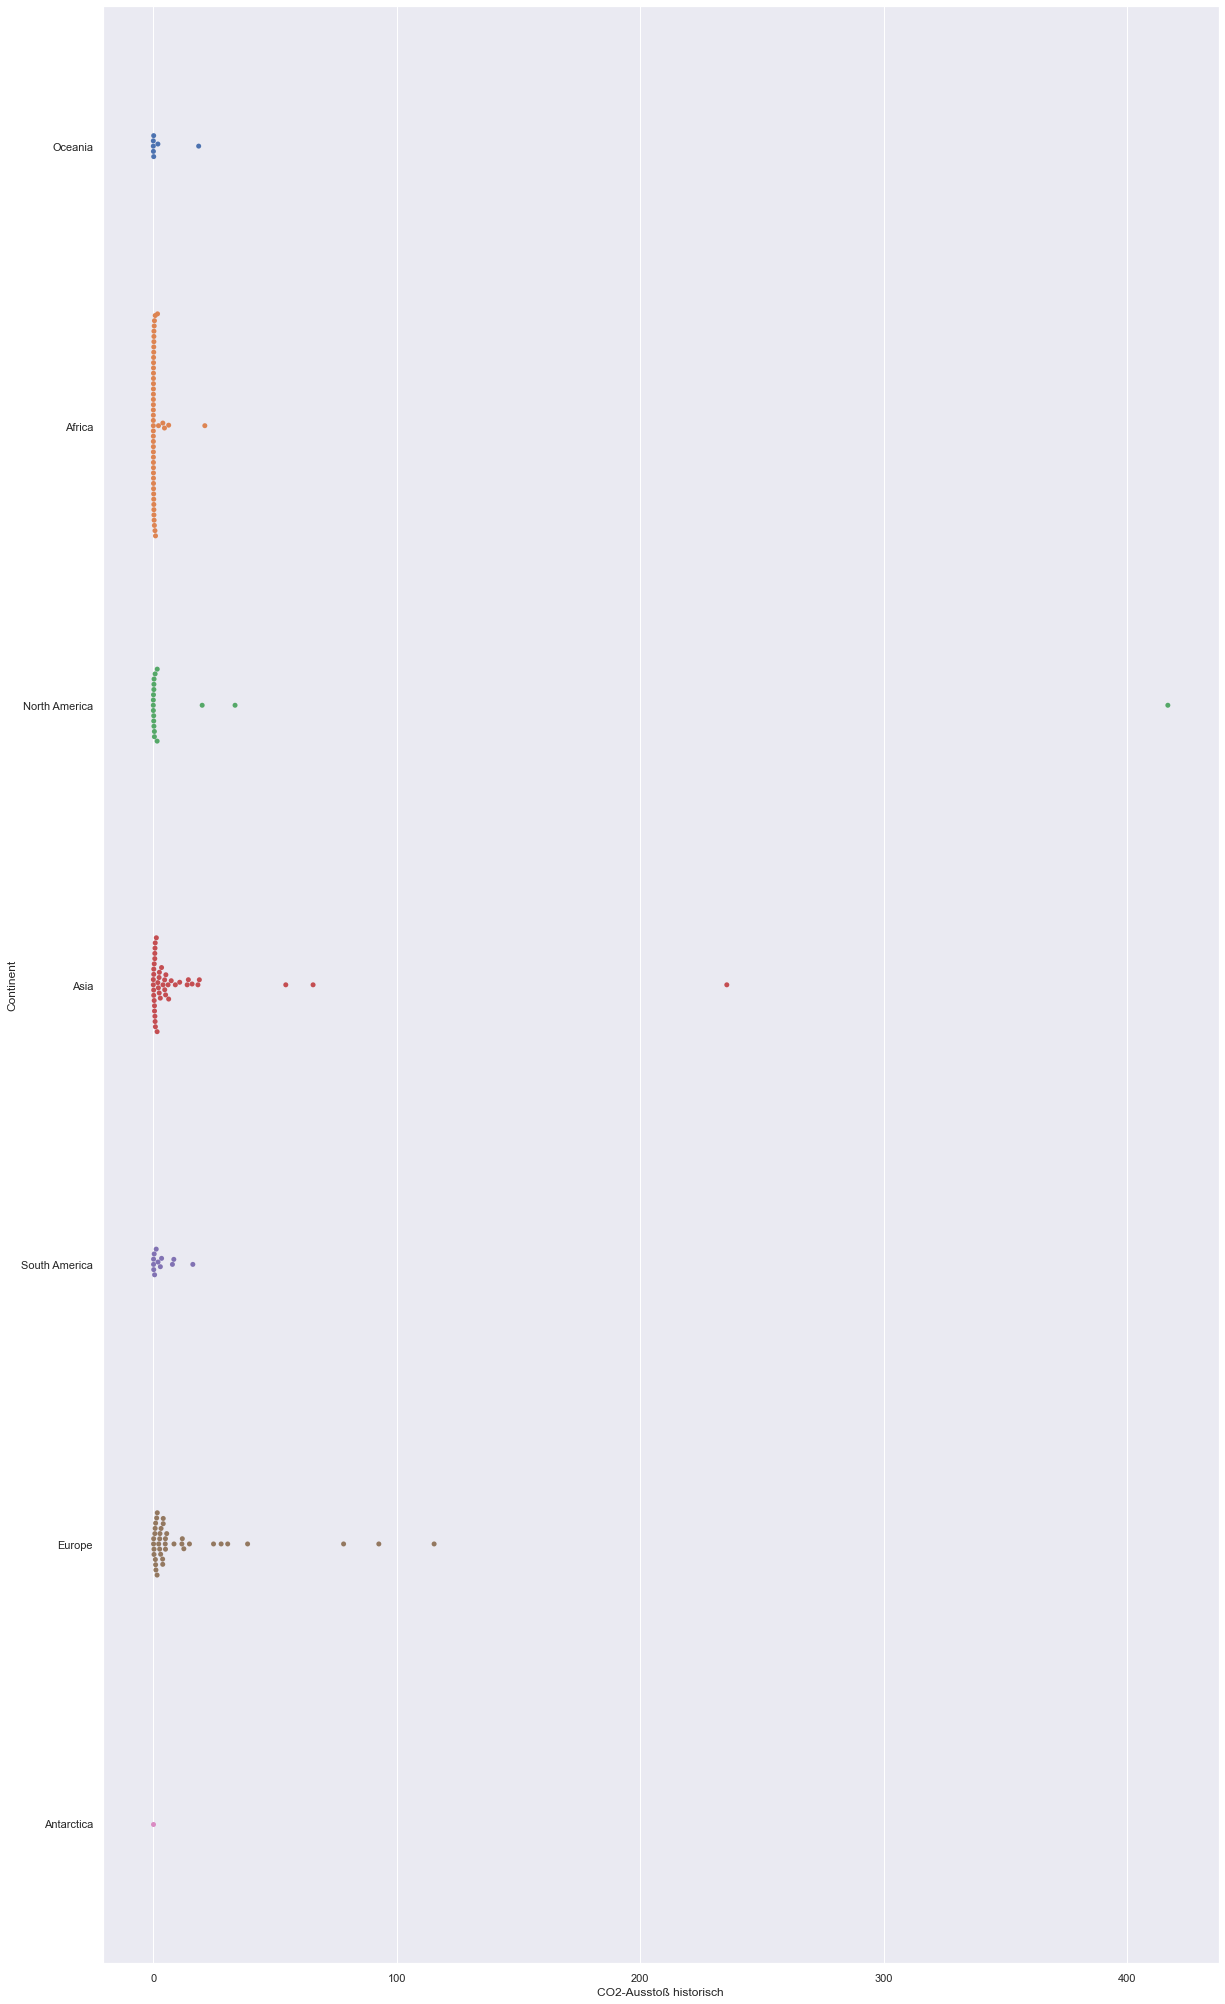

In [28]:
#Visualisierung im Swarmplot: CO2 historisch nach Kontinenten
sns.set(rc={'figure.figsize':(20,36)})
g = sns.swarmplot(x="CO2", y="Continent", data=co2_data_continents, size=5)
g.set_xlabel("CO2-Ausstoß historisch")

In [29]:
#Nach Europa filtern
Europa = co2_data_continents[(co2_data_continents['Continent'] == 'Europe')]

Text(0.5, 0, 'CO2-Ausstoß historisch (nur Europa)')

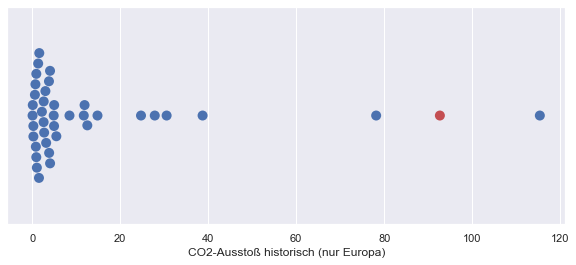

In [30]:
#Visualisierung im Swarmplot: CO2 historisch nur Europa 
sns.set(rc={'figure.figsize':(10,4)})
g = sns.swarmplot(x=Europa["CO2"], hue=Europa["Code"], y=[""]*len(Europa), size=10, palette=custom_palette)
g.legend(loc='right', bbox_to_anchor=(1.6, 0.5), ncol=1)
g.legend_.remove()
g.set_xlabel("CO2-Ausstoß historisch (nur Europa)")

##### 

In [31]:
#Einlesen CSV GDP; Quelle: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD
gdp_roh = pd.read_csv("gdp/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_3263806.csv", sep=",", encoding="1252", engine='python', skiprows = 4)

In [32]:
#Nach Jahr 2019 filtern
gdp_2019 = gdp_roh.drop(gdp_roh.columns.difference(['Country Code','2019']), axis=1)

In [33]:
#Spalten umbennen
gdp_2019.rename(columns = {'Country Code':'Code', '2019': 'BIP 2019' }, inplace = True)

In [34]:
#Es existieren Länder für die (noch) kein GDP für 2019 ausgewiesen wurden. Diese werden hier entfernt. 
gdp_2019.dropna(inplace=True)

In [35]:
#GDP und CO2 historisch verknüpfen
gpd_co2historisch = gdp_2019.merge(co2_data_continents, on='Code')

In [36]:
#GDP in Billionen umrechnen
gpd_co2historisch["BIP 2019"] = gpd_co2historisch["BIP 2019"]/1000000000000

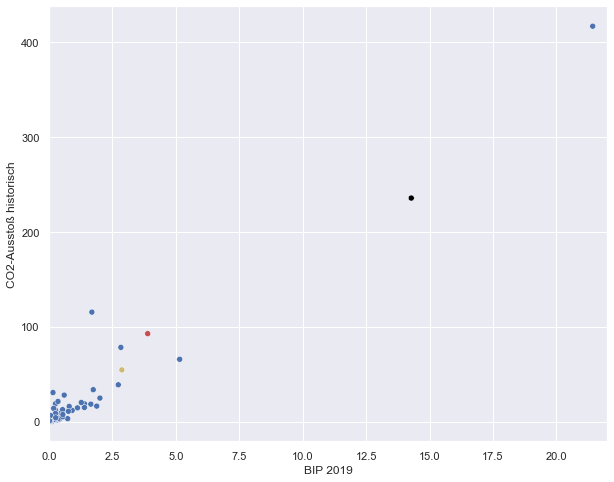

In [37]:
#Visualisierung im Scatterplot: CO2 historisch und BIP 2019
sns.set(rc={'figure.figsize':(10,8)})
g = sns.scatterplot(data=gpd_co2historisch, y="CO2", x="BIP 2019", hue = "Code", palette=custom_palette)
g.set(xlim=(0,22))
g.set_ylabel("CO2-Ausstoß historisch")
g.legend_.remove()

In [38]:
#Berechnung Korrelationkoeffizient BIP2919/CO2-Historisch(ACHTUNG: Ausreißer verfälschen das Ergebnis!)
from scipy.stats.stats import pearsonr

r = pearsonr(gpd_co2historisch["BIP 2019"], gpd_co2historisch["CO2"])[0]
print ('Der Korrelationskoeffizient beträgt:', round(r, 2))

Der Korrelationskoeffizient beträgt: 0.97


In [39]:
#GDP pro Kopf einlesen; Kaufkraftbereinigt; Quelle:  https://data.worldbank.org/indicator/NY.GDP.PCAP.CD 
gdp_pro_Kopf_roh = pd.read_csv("gdp/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3159040.csv", sep=",", encoding="1252", engine='python', skiprows = 4)

In [40]:
#Nach Jahr 2019 filtern
gdp_pro_Kopf_2019 = gdp_pro_Kopf_roh.drop(gdp_pro_Kopf_roh.columns.difference(['Country Code','2019']), axis=1)

In [41]:
#Spalten umbennen
gdp_pro_Kopf_2019.rename(columns = {'Country Code':'Code', '2019': 'BIP 2019 pro Kopf' }, inplace = True)

In [42]:
#Es existieren Länder für die (noch) kein GDP für 2019 ausgewiesen wurden. Diese werden hier entfernt. 
gdp_pro_Kopf_2019.dropna(inplace=True)

In [43]:
##GDP pro Kopf und CO2-Aussoß pro Kopf verknüpfen
gdp_pK_CO2 = gdp_pro_Kopf_2019.merge(weltkarteCo2ProKopf, on='Code')

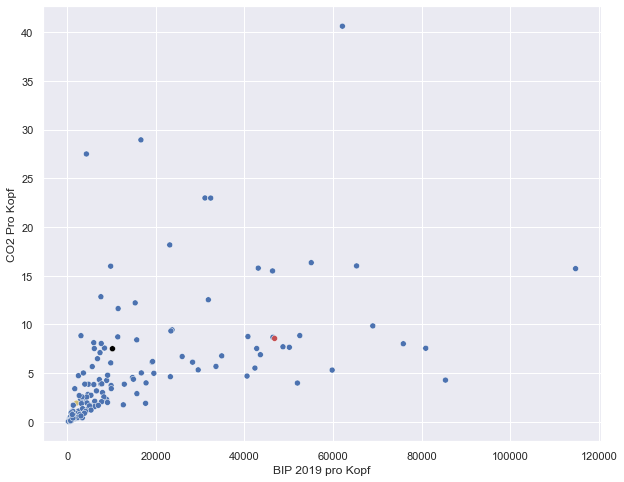

In [44]:
sns.set(rc={'figure.figsize':(10,8)})
g = sns.scatterplot(data=gdp_pK_CO2, y="CO2 Pro Kopf", x="BIP 2019 pro Kopf", hue = "Code", palette=custom_palette)
g.legend_.remove()

In [45]:
#Berechnung Korrelationkoeffizient BIP2919/CO2-Historisch(ACHTUNG: Ausreißer verfälschen das Ergebnis!)
from scipy.stats.stats import pearsonr

r = pearsonr(gdp_pK_CO2["BIP 2019 pro Kopf"], gdp_pK_CO2["CO2 Pro Kopf"])[0]
print ('Der Korrelationskoeffizient beträgt:', round(r, 2))

Der Korrelationskoeffizient beträgt: 0.54


In [46]:
bip=4.0
i=0.1

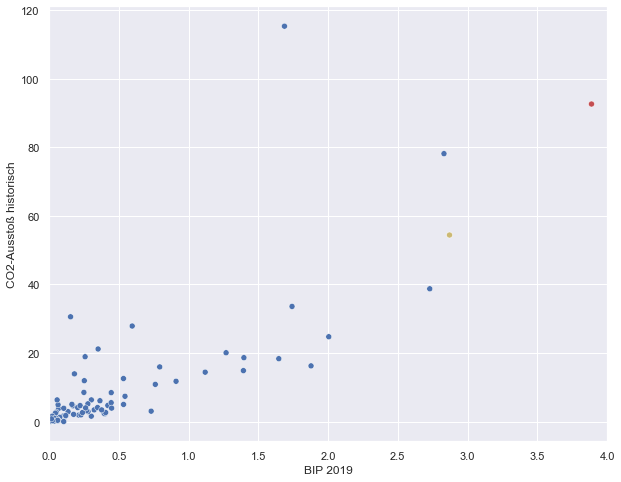

Der Korrelationskoeffizient beträgt: 0.83 





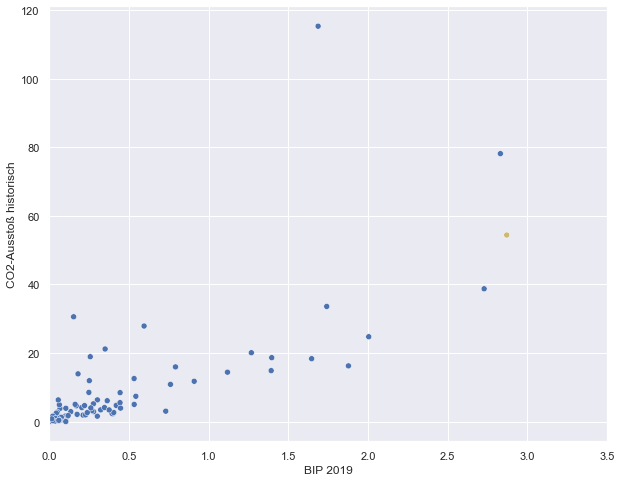

Der Korrelationskoeffizient beträgt: 0.78 





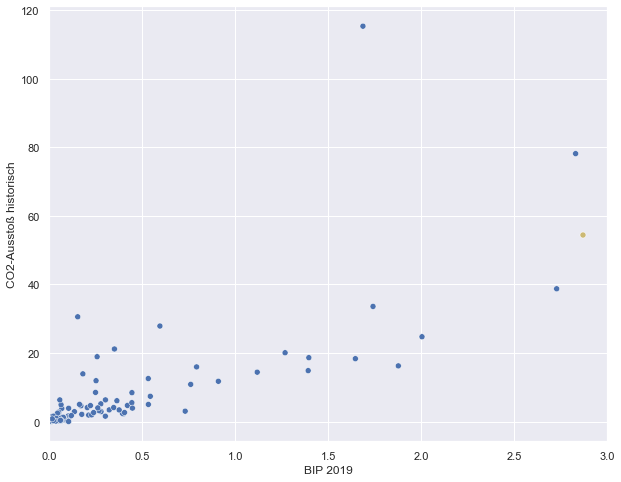

Der Korrelationskoeffizient beträgt: 0.78 





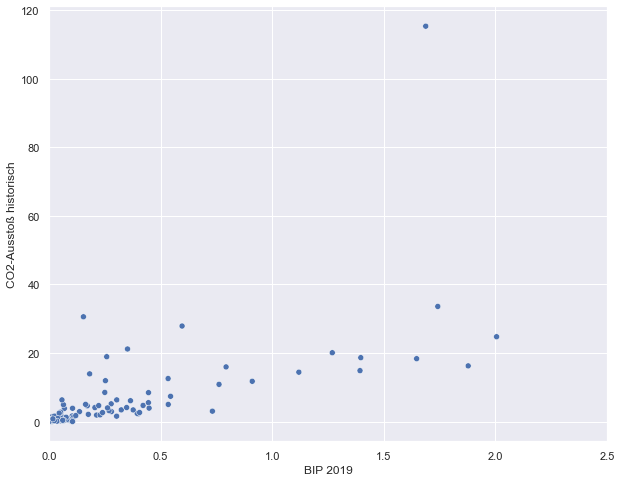

Der Korrelationskoeffizient beträgt: 0.67 





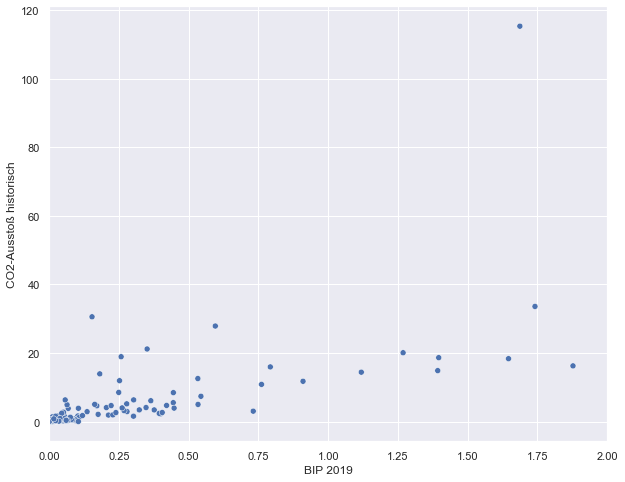

Der Korrelationskoeffizient beträgt: 0.67 





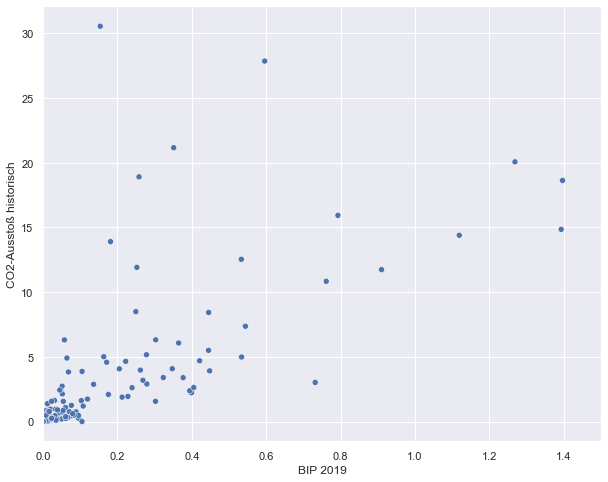

Der Korrelationskoeffizient beträgt: 0.7 





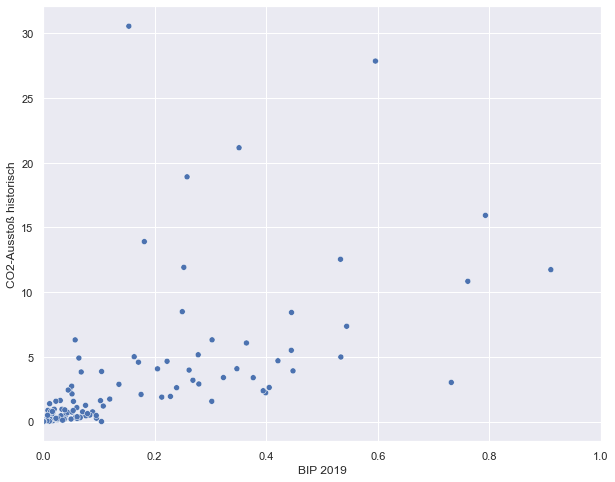

Der Korrelationskoeffizient beträgt: 0.62 





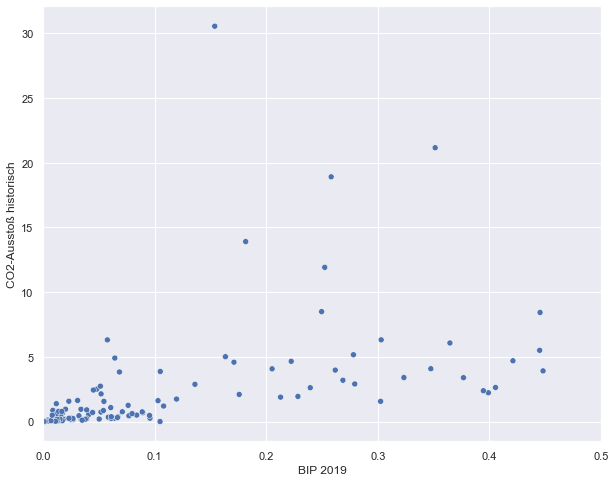

Der Korrelationskoeffizient beträgt: 0.52 





In [47]:
while i <= bip:
    gpd_co2historischBereinigt = gpd_co2historisch[gpd_co2historisch["BIP 2019"] < bip]
    g = sns.scatterplot(data=gpd_co2historischBereinigt, y="CO2", x="BIP 2019", hue = "Code", palette=custom_palette)
    g.set(xlim=(0,bip))
    g.set_ylabel("CO2-Ausstoß historisch")
    g.legend_.remove()
    plt.show()
    r = pearsonr(gpd_co2historischBereinigt["BIP 2019"], gpd_co2historischBereinigt["CO2"])[0]
    print ('Der Korrelationskoeffizient beträgt:', round(r, 2), "\n\n\n")
    bip=bip-0.5